In [1]:
import numpy as np
import matplotlib.pyplot as plt
from trigger import *
from time import time

In [2]:
n_sample = 1000
amplitude = np.linspace(10, 200, 20)
poly = np.linspace(3,4,2)
window = np.linspace(3,18,6)

In [52]:
total_eff = []
start = time()
for amp in amplitude:
    signals = []
    single_eff = [] 
    if amp<=35:#to speed up the test, values can be generalized using S/N
        window_ma = 21
    elif amp<=49:
        window_ma = 15
    elif amp<=75:
        window_ma = 12
    elif amp<=100:
        window_ma = 9
    else:
        window_ma = 6
    for i in range(n_sample):
        signals.append(gen_signal(baseline=-10, amplitude=amp, noise_lev=1, plot=False, pulse_start=np.random.uniform(199.5,200.5)))

    min = derivative_trigger_matrix(signals, window_ma, poly=3, mv = 'convolve')
    # New function to compute the efficiency
    # the idea is to put cycle into methods and not the other way around 
    # to lower computational cost
    single_eff = efficiency_matrix(min)
    total_eff.append(get_efficiency(single_eff, n_sample))
print('Total computational time: ' + str(time()-start))

Total computational time: 23.286068439483643


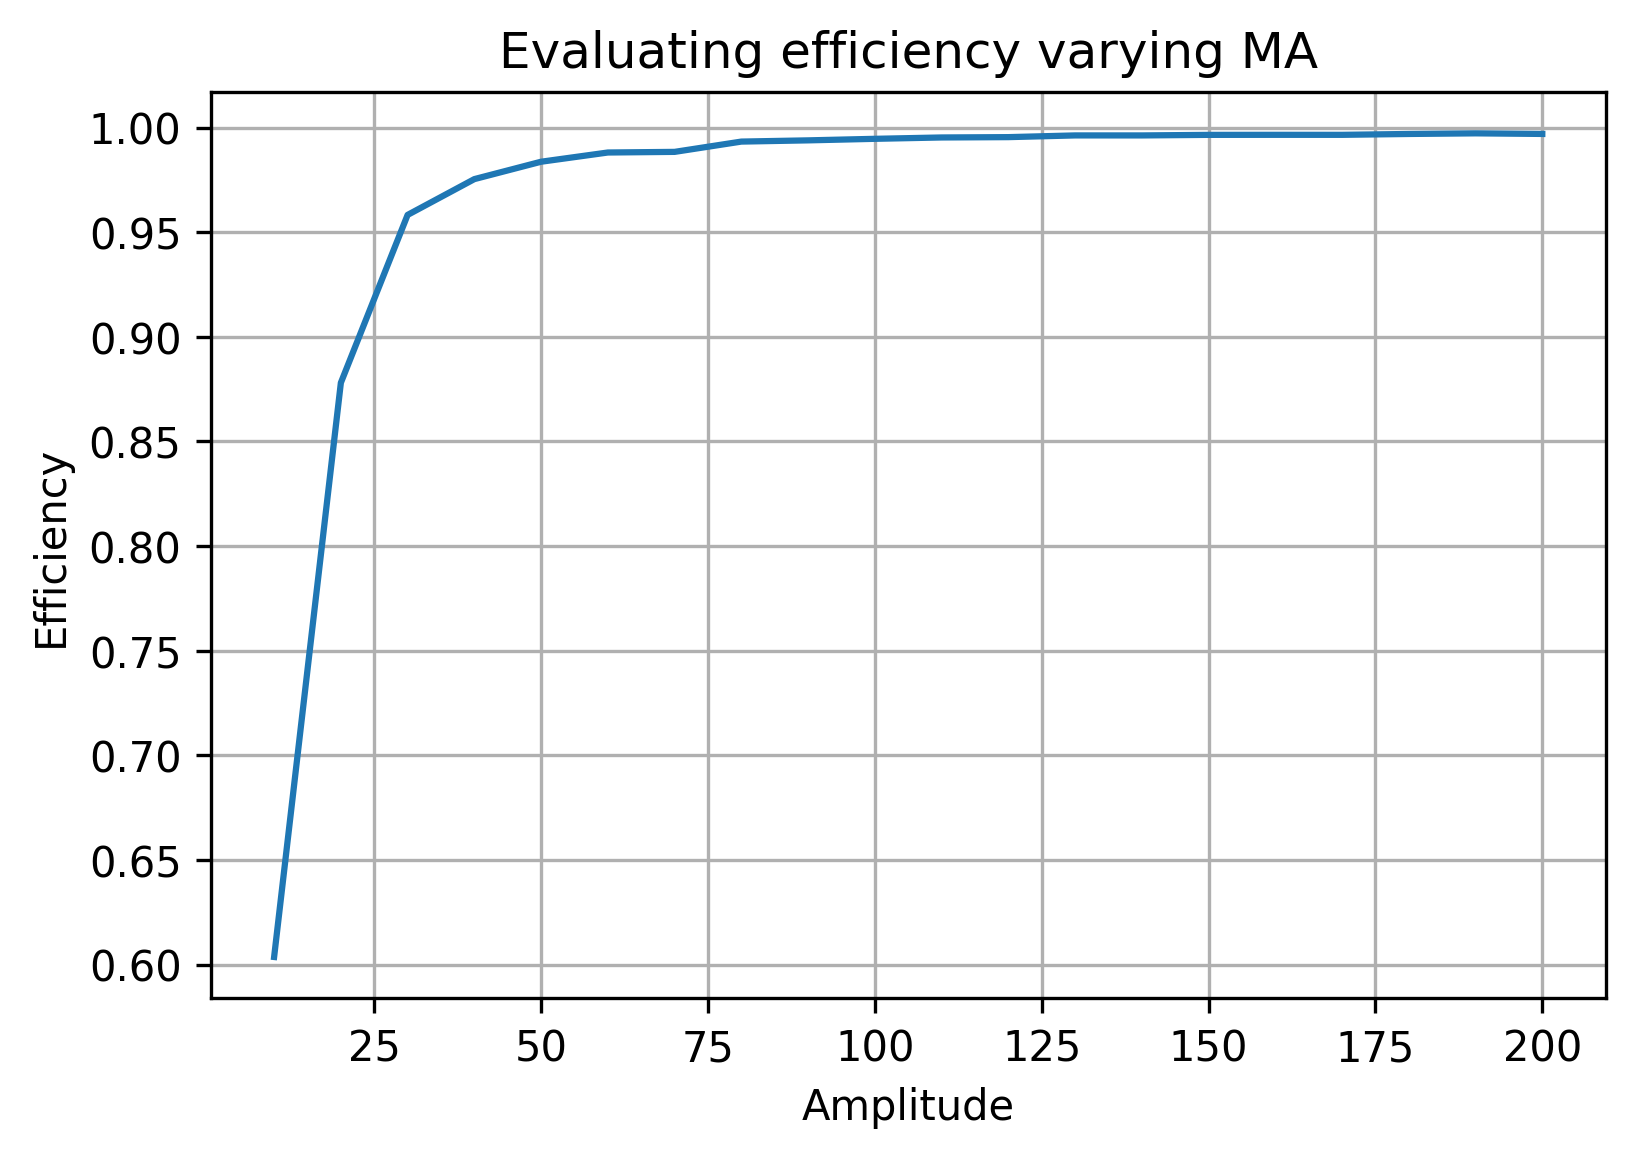

In [54]:
good_plot(amplitude, total_eff, 'Evaluating efficiency varying MA', 'Amplitude', 'Efficiency', good=True)

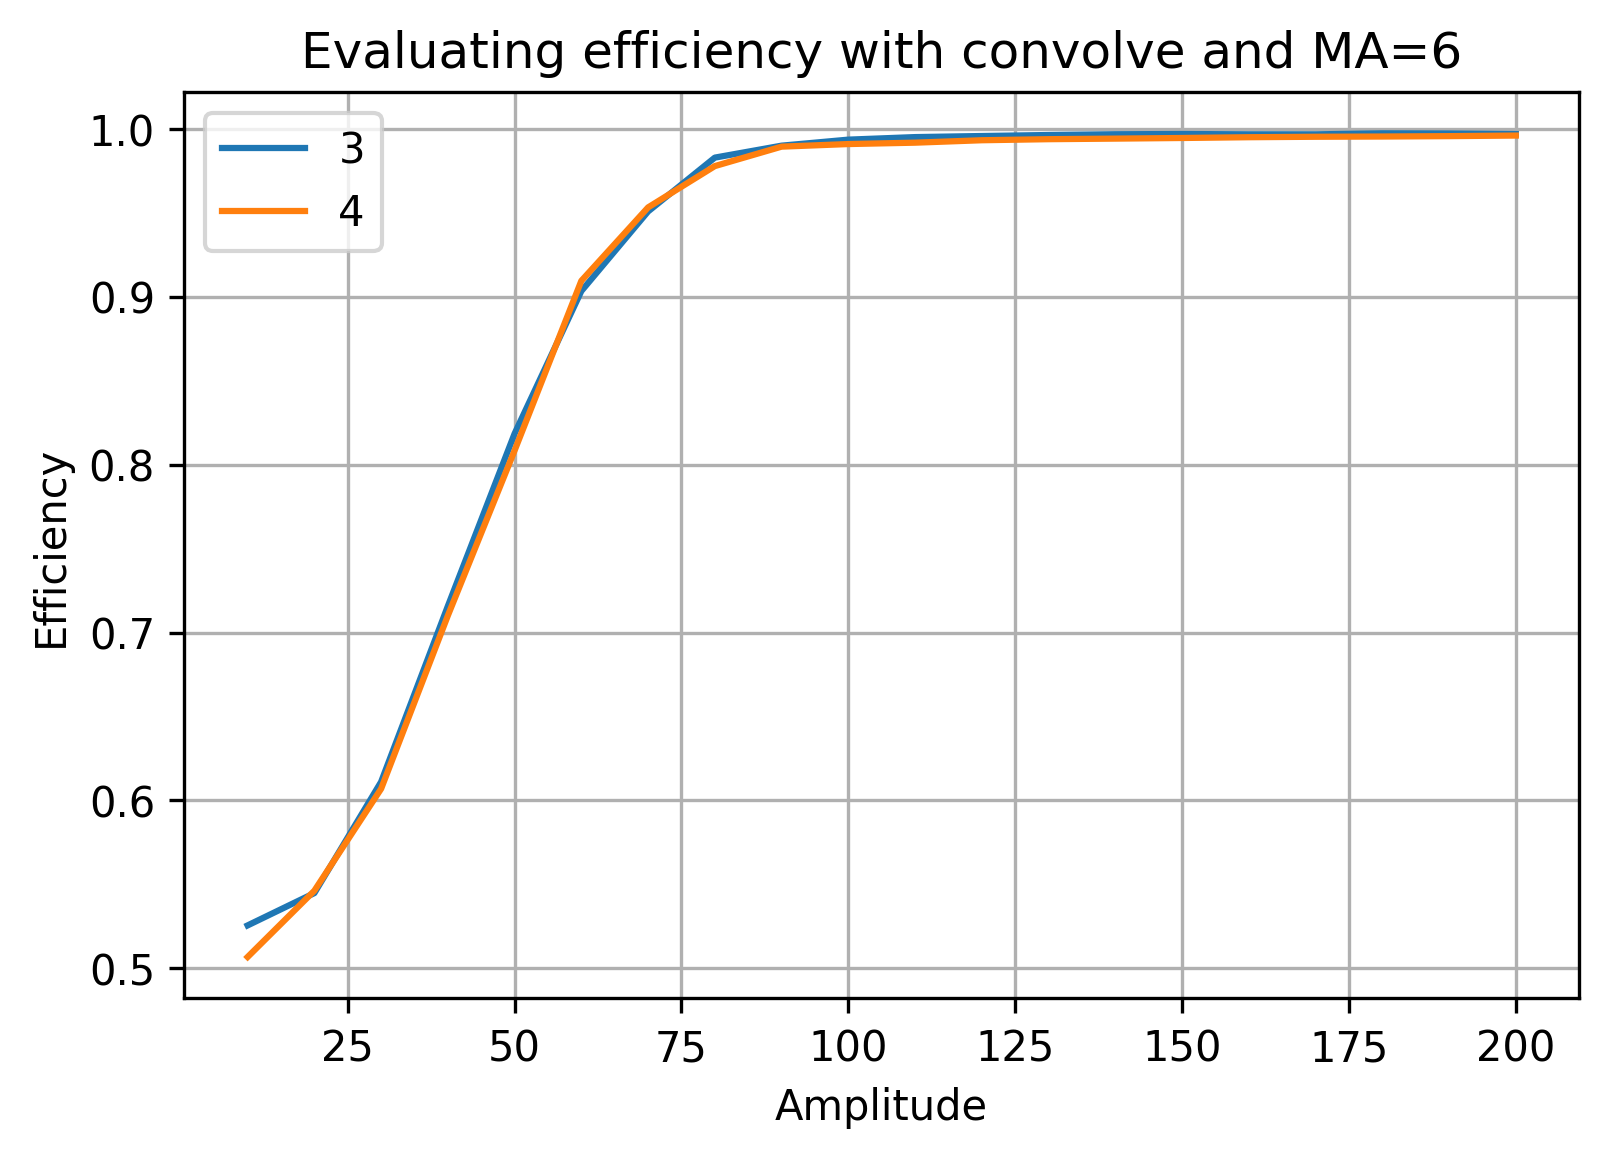

In [48]:
fig = plt.figure(dpi = 300)
fig.patch.set_facecolor('white')     
for i in range(0, len(tot)):  
    plt.plot(amplitude, tot[i], label=str(int(poly[i])))
plt.title('Evaluating efficiency with convolve and MA=6')
plt.legend()
plt.xlabel('Amplitude')
plt.ylabel('Efficiency')
plt.grid()
plt.show()

In [5]:
total_eff2 = []
start = time()
for amp in amplitude:
    signals = []
    single_eff = []
    
    for i in range(n_sample):
        signals.append(gen_signal(baseline=-10, amplitude=amp, noise_lev=0, plot=False, pulse_start=np.random.uniform(199.5,200.5)))

    # Ho aggiunto una variabile window_ma per la moving average e selezionare la moving average, di default è convolve,
    # in questo caso è cumsum, come si vede dai grafici, l'efficienza è al di sotto del 95%, meno performante del convolve
    # teniamolo come campione di riferimento, cumsum non usa dei pesi
    min = derivative_trigger_matrix(signals, window_ma=10, n=2, mv='cumsum', plot=False, vertex=False)
    single_eff = efficiency_matrix(min)
    total_eff2.append(get_efficiency(single_eff, n_sample))
print('Total computational time: ' + str(time()-start))

Total computational time: 24.12828493118286


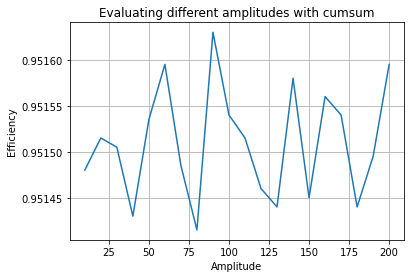

In [56]:
good_plot(amplitude, total_eff2, 'Evaluating different amplitudes with cumsum', 'Amplitude', 'Efficiency')

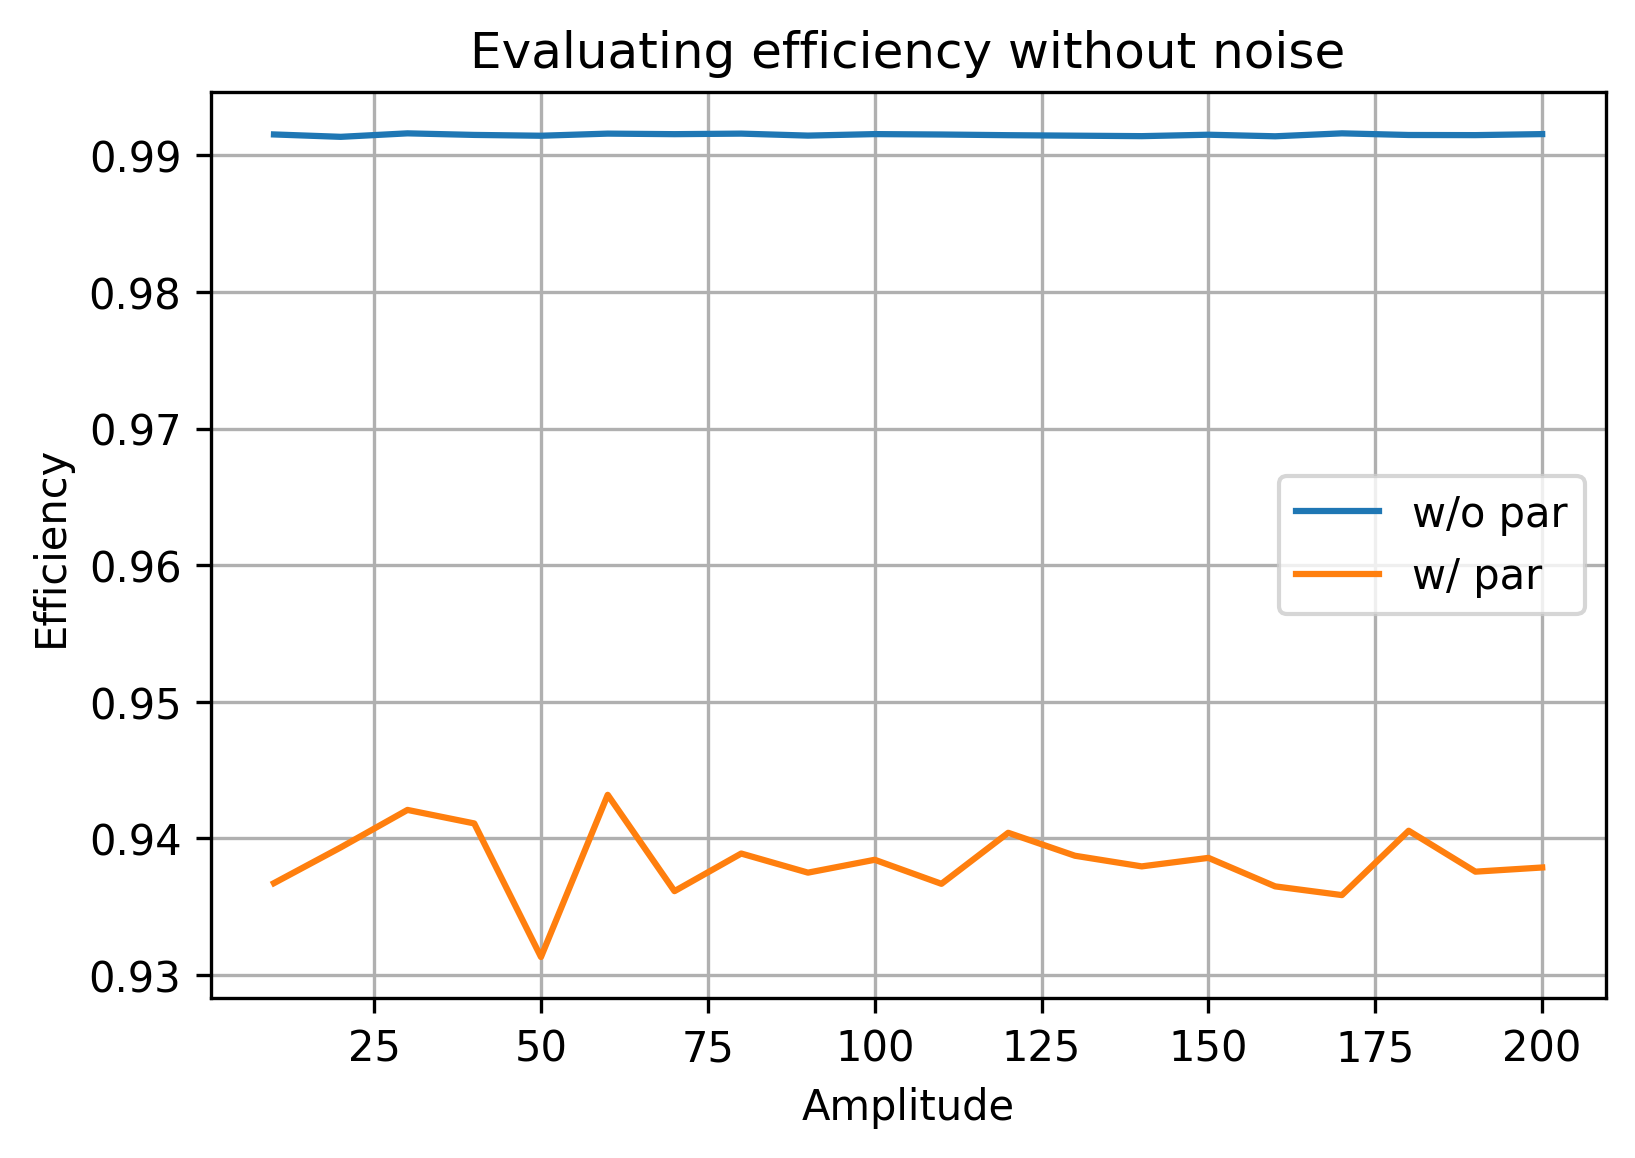

In [13]:
multiple_plots(amplitude, total_eff, 'w/o par', total_eff2, 'w/ par', title='Evaluating efficiency without noise', x_label = 'Amplitude', y_label = 'Efficiency')